<a href="https://colab.research.google.com/github/VanessaLaraPerez/ProblemaViajante_VanessaLara/blob/main/Vanessa_Lara_Inteligencia_Artificial_Problema_del_Vendedor_Ambulante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema del Viajante

https://es.wikipedia.org/wiki/Problema_del_viajante


Dada una lista de ciudades y las distancias entre ellas, las capitales de todas las provincias españolas, por ejemplo, ¿cual es la ruta mas corta que visita cada ciudad y regresa a la ciudad original?

Cuaderno adaptado de:

https://colab.research.google.com/github/Albina1810/tsp/blob/master/TSP.ipynb

Por Prof. Hector Barrio Crespo.


Universidad Europea, 2021
Revisado Octubre 2022

# Intercambio par a par
El intercambio par a par o técnica 2-opt involucra en cada iteración la eliminación de dos aristas y el reemplazo de estas con dos aristas diferentes que reconecten los fragmentos creados por la eliminación de las aristas produciendo un camino nuevo más corto. Esto es un caso especial del método k-opt. 

Note que la etiqueta Lin–Kernighan es un nombre erróneo para el 2-opt muchas veces utilizado. Lin–Kernighan es realmente el método más general de k-opt (https://en.wikipedia.org/wiki/2-opt).

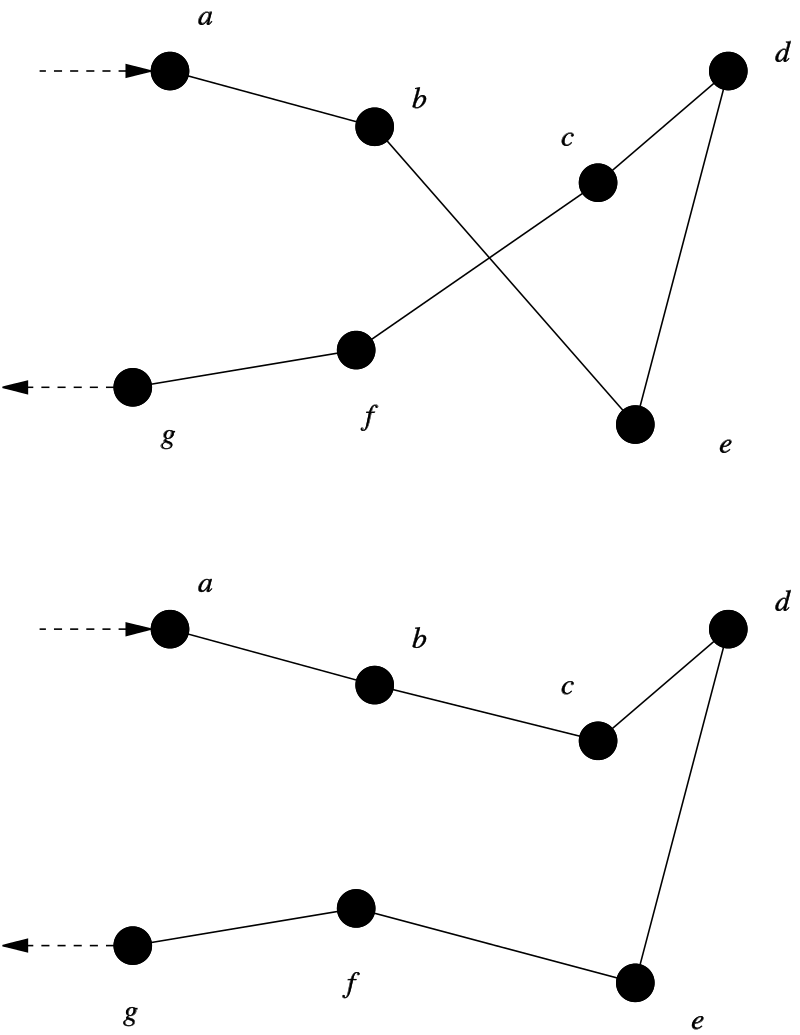

In [7]:
import numpy as np
import pandas as pd
from math import radians, cos, sin
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from google.colab import files

In [8]:
# Calculamos la distancia euclidiana en espacio de la ruta r por la ciudad c,
# terminando al inicio:
distancia_ruta = lambda r, c: np.sum([np.linalg.norm(c[r[p]]-c[r[p-1]]) 
                                    for p in range(len(r))])

# Invertir el orden de los elementos desde i a k en r:
inversion = lambda r, i, k: np.concatenate((r[0:i],
                                            r[k:-len(r)+i-1:-1],
                                            r[k+1:len(r)]))

def two_opt(ciudades, umbral_mejora):
    # Vector de filas con las ciudades:
    ruta = np.arange(ciudades.shape[0])
    # Inicializar el factor de mejora:
    f_mejora = 1
    # Calcular la distancia de la primera ruta:
    mejor_dist = distancia_ruta(ruta, ciudades)
    
    # Si la ruta mejora seguimos optimizando:
    while f_mejora > umbral_mejora:
        # Guardamos la mejor distancia obtenida:
        dist_a_mejorar = mejor_dist 
        
        # Para cada ciudad, excluyendo la primera y la ultima:
        for cambiar_primera in range(1, len(ruta)-2):
            # Para cada ciudad subsiguiente:
            for cambiar_ultima in range(cambiar_primera + 1, len(ruta)):
                # Invertimos el orden de las ciudades:
                nueva_ruta = inversion(ruta, cambiar_primera, cambiar_ultima)
                # Comprobamos la distancia con este cambio:
                nueva_distancia = distancia_ruta(nueva_ruta, ciudades)

                # Si ha mejorado la distancia:                
                if nueva_distancia < mejor_dist: 
                    # Esta es nuestra nueva mejor ruta:
                    ruta = nueva_ruta
                    # Esta es nuestra mejor distancia:
                    mejor_dist = nueva_distancia
        # Calculamos cuanto ha mejorado la ruta:
        f_mejora = 1 - mejor_dist/dist_a_mejorar
        # Si la ruta no mejora de manera sustancial, devolvemos la ruta:
    return ruta

# **Importar csv con Longitud y Latitud de las ciudades**

Importamos un archivo csv con longitud y latitud de ciudades, en este caso ciudades de Madrid extraidas de https://www.coordenadas.com.es/espana/pueblos-de-madrid/28/1

In [9]:
!wget https://raw.githubusercontent.com/VanessaLaraPerez/ProblemaViajante_VanessaLara/main/ciudades_madrid.csv

--2022-11-17 17:12:33--  https://raw.githubusercontent.com/VanessaLaraPerez/ProblemaViajante_VanessaLara/main/ciudades_madrid.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9163 (8.9K) [text/plain]
Saving to: ‘ciudades_madrid.csv.1’

ciudades_madrid.csv 100%[===================>]   8.95K  --.-KB/s    in 0s      

2022-11-17 17:12:33 (63.8 MB/s) - ‘ciudades_madrid.csv.1’ saved [9163/9163]



In [10]:
ciudades = pd.read_csv("/content/ciudades_madrid.csv", header=None)
ciudades.head(10)

,0,1
0,- Acebeda-La,"41.0930184542923,-3.6201388451"
1,- Ajalvir,"40.5290869072082,-3.4765786497"
2,- Alameda-del-Valle,"40.9204642345628,-3.8482444566"
3,- alamo-El,"40.2328447920607,-3.9873046784"
4,- Alcala-de-Henares,"40.4994044151797,-3.3401732231"
5,- Alcobendas,"40.5361528074896,-3.6291320200"
6,- Alcorcon,"40.3492301805427,-3.8284724950"
7,- Aldea-del-Fresno,"40.3064188142099,-4.2175445017"
8,- Algete,"40.6149831488445,-3.5332791623"
9,- Alpedrete,"40.6619057447873,-4.0188988955"


In [11]:
ciudades[1].str.split(',')

0      [41.0930184542923, -3.6201388451]
1      [40.5290869072082, -3.4765786497]
2      [40.9204642345628, -3.8482444566]
3      [40.2328447920607, -3.9873046784]
4      [40.4994044151797, -3.3401732231]
                     ...                
174    [40.3341448835656, -3.2368799729]
175    [40.1184071263897, -3.2694142410]
176    [40.3593642874759, -3.9142227172]
177    [41.0230221203671, -3.6880669195]
178    [40.5449968240231, -4.1709139501]
Name: 1, Length: 179, dtype: object

In [12]:
ciudades[['Lon', 'Lat']] = ciudades[1].str.split(',', 1, expand=True)

In [13]:
ciudades.tail()

,0,1,Lon,Lat
174,- Villar-del-Olmo,"40.3341448835656,-3.2368799729",40.3341448835656,-3.2368799729
175,- Villarejo-de-Salvanes,"40.1184071263897,-3.2694142410",40.1184071263897,-3.2694142410
176,- Villaviciosa-de-Odon,"40.3593642874759,-3.9142227172",40.3593642874759,-3.9142227172
177,- Villavieja-del-Lozoya,"41.0230221203671,-3.6880669195",41.0230221203671,-3.6880669195
178,- Zarzalejo,"40.5449968240231,-4.1709139501",40.5449968240231,-4.1709139501


In [14]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       179 non-null    object
 1   1       179 non-null    object
 2   Lon     179 non-null    object
 3   Lat     179 non-null    object
dtypes: object(4)
memory usage: 5.7+ KB


In [15]:
# Por defecto, el tipo de datos en el dataframe es "object".
# Pasando los datos a tipo "numeric" mejoramos la manera de trabajar con ellos.
ciudades['Lon'] = ciudades['Lon'].apply(pd.to_numeric)
ciudades['Lat'] = ciudades['Lat'].apply(pd.to_numeric)

In [16]:
ciudades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       179 non-null    object 
 1   1       179 non-null    object 
 2   Lon     179 non-null    float64
 3   Lat     179 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.7+ KB


# **Convertidor de Latitud y Longitud a Coordenadas Cartesianas**

** R de la tierra =6371 KM**
 
 
 x = R * cos( radiance(lat) ) * cos(radiance (lon))
 
 
 y = R * cos( radiance(lat) ) * sin(radiance (lon))
 
 
 http://www.geomidpoint.com/example.html
 
 
 


In [17]:
R = 6371
lat = ciudades["Lat"].map(radians)
lon = ciudades["Lon"].map(radians)
x = lon.map(cos) * lat.map(cos) * R
y = lon.map(cos) * lat.map(sin) * R

ciudades["lat_rads"] = lat
ciudades["lon_rads"] = lon
ciudades["x"] = x
ciudades["y"] = y
ciudades.head()

,0,1,Lon,Lat,lat_rads,lon_rads,x,y
0,- Acebeda-La,"41.0930184542923,-3.6201388451",41.093018,-3.620139,-0.063183,0.717208,4791.881810,-303.170648
1,- Ajalvir,"40.5290869072082,-3.4765786497",40.529087,-3.476579,-0.060678,0.707366,4833.533567,-293.648385
2,- Alameda-del-Valle,"40.9204642345628,-3.8482444566",40.920464,-3.848244,-0.067165,0.714197,4803.198076,-323.090546
3,- alamo-El,"40.2328447920607,-3.9873046784",40.232845,-3.987305,-0.069592,0.702196,4852.013493,-338.205509
4,- Alcala-de-Henares,"40.4994044151797,-3.3401732231",40.499404,-3.340173,-0.058297,0.706848,4836.359476,-282.265183


In [18]:
ciudades_d = ciudades.drop([1, "Lon","Lat", "lat_rads", "lon_rads"], 1)
ciudades_d.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,0,x,y
0,- Acebeda-La,4791.881810,-303.170648
1,- Ajalvir,4833.533567,-293.648385
2,- Alameda-del-Valle,4803.198076,-323.090546
3,- alamo-El,4852.013493,-338.205509
4,- Alcala-de-Henares,4836.359476,-282.265183


In [19]:
ciudades_d.set_index(0, inplace=True)

In [20]:
ciudades_d.head()

,x,y
0,,
- Acebeda-La,4791.881810,-303.170648
- Ajalvir,4833.533567,-293.648385
- Alameda-del-Valle,4803.198076,-323.090546
- alamo-El,4852.013493,-338.205509
- Alcala-de-Henares,4836.359476,-282.265183


In [21]:
df = ciudades_d.copy()

In [22]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=['x1', 'x2'])

In [23]:
df_escalado

,x1,x2
0,3.963072,66.237572
1,55.779636,74.212138
2,18.040989,49.555346
3,78.769453,36.897086
4,59.295188,83.745178
...,...,...
174,74.716292,90.484067
175,93.763250,87.438402
176,68.008666,42.600401
177,9.858371,61.204631


In [24]:
%load_ext google.colab.data_table
df_escalado

,x1,x2
0,3.963072,66.237572
1,55.779636,74.212138
2,18.040989,49.555346
3,78.769453,36.897086
4,59.295188,83.745178
...,...,...
174,74.716292,90.484067
175,93.763250,87.438402
176,68.008666,42.600401
177,9.858371,61.204631


In [25]:
ciudades_d = np.asarray(ciudades_d)

In [26]:
escalado = np.asarray(df_escalado)
escalado

array([[3.96307165e+00, 6.62375719e+01],
       [5.57796355e+01, 7.42121385e+01],
       [1.80409891e+01, 4.95553458e+01],
       [7.87694527e+01, 3.68970858e+01],
       [5.92951877e+01, 8.37451777e+01],
       [5.41517179e+01, 6.34622727e+01],
       [6.95246283e+01, 4.86304392e+01],
       [7.04691662e+01, 2.08965967e+01],
       [4.77016843e+01, 7.05270162e+01],
       [4.01263845e+01, 3.64731457e+01],
       [7.43469309e+01, 9.51106321e+01],
       [6.24221848e+01, 8.81343627e+01],
       [1.00000000e+02, 5.93652864e+01],
       [7.67837721e+01, 7.52837988e+01],
       [7.44967899e+01, 4.18759606e+01],
       [1.97585028e+01, 7.59657802e+01],
       [7.98674612e+01, 4.10725214e+01],
       [3.70430159e+01, 4.26496883e+01],
       [9.20542910e+01, 8.26467207e+01],
       [2.29454702e+01, 7.01489605e+01],
       [1.53571036e+01, 7.19294531e+01],
       [6.41748123e+01, 4.48755888e+01],
       [3.73621460e+01, 4.39849714e+01],
       [7.02898649e+00, 6.35971399e+01],
       [8.392558

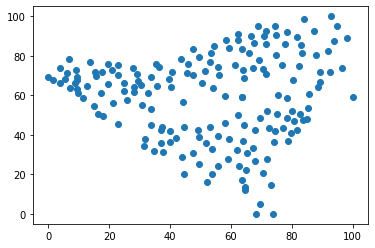

In [27]:
# Mostramos las Ciudades.
plt.scatter(escalado[:, 0], escalado[:, 1]);


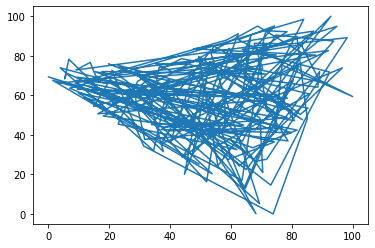

In [28]:
# Mostramos la ruta inicial, estan organizadas en orden alfabetico.
plt.plot(escalado[:, 0], escalado[:, 1])
plt.show()

# Busqueda de Rutas

In [ ]:
#  Encontramos una buena ruta (la ruta da el orden de viaje por numero de fila)
ruta = two_opt(escalado, 0.001)
ruta

In [ ]:
# Diagrama Cartesiano
# Reordenamos la matriz por ruta:
nuevo_orden = np.concatenate((np.array([escalado[ruta[i]] 
                                        for i in range(len(ruta))]),
                              np.array([escalado[0]])))

In [ ]:
nuevo_orden

In [ ]:
# Mostramos las Ciudades.
plt.scatter(escalado[:,0], escalado[:,1])
# Mostramos la Ruta.
plt.plot(nuevo_orden[:,0], nuevo_orden[:,1])
plt.show()
# Imprimimos la ruta y la distancia:
print("Ruta: " + str(ruta) + "\n\nDistancia Escalada: " 
      + str(distancia_ruta(ruta, escalado)))

In [ ]:
orden = pd.DataFrame(ruta, columns=["index"])
ciudades["index"] = ciudades.index
viaje = orden.merge(ciudades, on = "index")
viaje

In [ ]:
inicio = viaje[0:1]
ciclo = viaje.append(inicio)
ciclo

In [ ]:
# Dibujar Latitud y Longitud
ciclo.plot(kind="line", x="Lat", y="Lon");

# Representacion de las Rutas

In [ ]:
# Escribimos la ruta como puntos:
viajante = ciclo[["Lon", "Lat"]]

In [ ]:
viajante

In [ ]:
viajante.iloc[0]

In [ ]:
import folium

In [ ]:
mapa = folium.Map(location=viajante.iloc[0], zoom_start=10.2)
puntos_totales = len(viajante)
for i in range(0, puntos_totales):
  x = viajante.iloc[i]['Lon']
  y = viajante.iloc[i]['Lat']
  punto = [x, y]
  ciudad = ciclo.iloc[i][0]

  if i == 0 or i == puntos_totales - 1: 
    color = 'black'
  else:
    color = 'blue'

  icon = folium.Icon(color=color)
  # folium.Marker(punto, popup=ciudad, icon=icon).add_to(mapa)

  if i != 0:
    x_ant = viajante.iloc[i-1]['Lon']
    y_ant = viajante.iloc[i-1]['Lat']
    punto_anterior = [x_ant, y_ant]
    folium.PolyLine([punto, punto_anterior],
                  color='red',
                  weight=15,
                  opacity=0.8).add_to(mapa)

  
mapa